# Pre-selection cuts on data

The first part of this notebook, we will be applying easy pre-selection cuts on data before training

### Pre-selection cuts before training:
- Reta
- ws2
- rhad
- f3

In the second part of this notebook, we will be applying a trigger tower pt cut on data.
<br>
This is to ensure fair comparison of rejection value between ML models and CNN

In [1]:
# Importing required package

import numpy as np
import matplotlib as mpl  
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Setting parameters for plot

mpl.rcParams['figure.figsize'] = [14.0, 10.0]
mpl.rcParams['font.size']=18
plt.style.use('seaborn-darkgrid')

## Importing data

Simulated data used:
- elefull.dat
- jetfull.dat
- jetfull_jz1.dat
- jetfull_jz2.dat
- jetfull_jz3.dat

In [3]:
ele_data = np.loadtxt('elefull(nolabels).txt', delimiter = '	')

jet_data1 = np.loadtxt('jetfull(nolabels).txt', delimiter = '	')
jet_data2 = np.loadtxt('jetfull_jz1(nolabels).txt', delimiter = '	')
jet_data3 = np.loadtxt('jetfull_jz2(nolabels).txt', delimiter = '	')
jet_data4 = np.loadtxt('jetfull_jz3(nolabels).txt', delimiter = '	')
jet_data = np.concatenate((jet_data1, jet_data2, jet_data3, jet_data4), axis =0)

print("Initial number of ele data", len(ele_data))
print("Initial number of jet data", len(jet_data))
print("Shape of data", np.shape(ele_data[0]))

Initial number of ele data 27524
Initial number of jet data 45749
Shape of data (63,)


# 1st part
## Finding Cut Value

Firstly, given a specific signal efficiency, the range of cut value for each parameter is estimated as below.

- `Reta` at 98%: [0.8, 0.9]
- `ws2` at 99%: [10000, 15000]
- `rhad` at 99%: [0, 0.07]
- `f3` at 99%: [0, 0.04]

For `Reta` & `ws2`, we take data that are above cut value

For `rhad` & `f3`, we take data that are below cut value

In [4]:
cut_est = [np.linspace(0.8, 0.9, 1000),
           np.linspace(10000, 15000, 1000),
           np.linspace(0, 0.07, 1000),
           np.linspace(0, 0.04, 1000),
          ]
sig = [0.98,0.99,0.99,0.99]

para_name = ["Reta","ws2","rhad","f3"]

para_index = [6,8,10,9]

para_type = [1, 1, 2, 2]

In [5]:
def cut_value(cut_est, sig, para_name, para_index, para_type):
    '''
    Function to find cut value given a specific signal efficiency using a for loop
    
    Input:
    cut_est = estimated range of cut value
    sig = required signal efficiency
    para_name = parameter cut name
    para_index = parameter cut index in data
    para_type = two types of cut
    
    Output:
    cut = final cut value
    '''
    # Initialise cut value
    cut = 0
    
    # Loop to find cut value in estimated range that gives required signal efficiency
    for i in cut_est:
        ele_store = []                               # temporary storage for electron that passes cut
        
        # Two types of cut (above/below cut value)
        if para_type == 1:
            for j in range(len(ele_data)):
                if ele_data[j][para_index] >= i:
                    ele_store.append(ele_data[j])
            est_sig = len(ele_store)/len(ele_data)   # calculating signal efficiency using estimated cut
            if est_sig <= sig:                       # stop loop when required signal efficiency is achieved
                cut = i
                break
                
        if para_type == 2:
            for j in range(len(ele_data)):
                if ele_data[j][para_index] <= i:
                    ele_store.append(ele_data[j])
            est_sig = len(ele_store)/len(ele_data)  # calculating signal efficiency using estimated cut
            if est_sig >= sig:                      # stop loop when required signal efficiency is achieved
                cut = i
                break
                
    print(para_name, "cut value for {0:.4f} signal efficiency = {1:.5f}".format(est_sig, cut)) # print cut value and signal efficiency achieved
    return cut

### Applying cut

In [6]:
# Using function to find cut value for each parameter
cut = []
for i, j, k, l, m in zip(cut_est, sig, para_name, para_index, para_type):
    cut.append(cut_value(i, j, k, l,m))
    

# Applying cut to ele data    
ele_data_cut = []
for i in range (len(ele_data)):
    if ele_data[i][6]>=cut[0] and ele_data[i][8]>=cut[1] and ele_data[i][10]<=cut[2] and ele_data[i][9]<=cut[3]:
        ele_data_cut.append(ele_data[i])
        
# Applying cut to jet data
jet_data_cut = []
for i in range (len(jet_data)):
    if jet_data[i][6]>=cut[0] and jet_data[i][8]>=cut[1] and jet_data[i][10]<=cut[2] and jet_data[i][9]<=cut[3]:
        jet_data_cut.append(jet_data[i])

f_sig = len(ele_data_cut)/len(ele_data)                             # calculating final signal achieved
print("Final signal efficiency achieved = {0:.4f}".format(f_sig))   # print final signal efficiency

Reta cut value for 0.9799 signal efficiency = 0.85215
ws2 cut value for 0.9897 signal efficiency = 14604.60460
rhad cut value for 0.9900 signal efficiency = 0.05543
f3 cut value for 0.9900 signal efficiency = 0.02539
Final signal efficiency achieved = 0.9541


### Saving cut data as .txt file

Output data are saved into two text file. (cut_ele_data.txt, cut_jet_data.txt)

In [7]:
np.savetxt("cut_ele_data.txt", ele_data_cut,  delimiter = '	')
np.savetxt("cut_jet_data.txt", jet_data_cut,  delimiter = '	')

In [8]:
print("Number of ele data remaining after cut", len(ele_data_cut))
print("Number of jet data remaining after cut", len(jet_data_cut))

Number of ele data remaining after cut 26261
Number of jet data remaining after cut 6593


# 2nd part
## Trigger Tower Pt cut @ 30GeV

First, we try to find a trigger tower pt cut value required to remove electrons with pt under 30GeV.

This is done by plotting the trigger tower pt distribution for electrons which have pt under and above 30GeV separately.

Number of ele have Pt lower than 30GeV: 7425
Number of ele have Pt higher than 30GeV: 18836


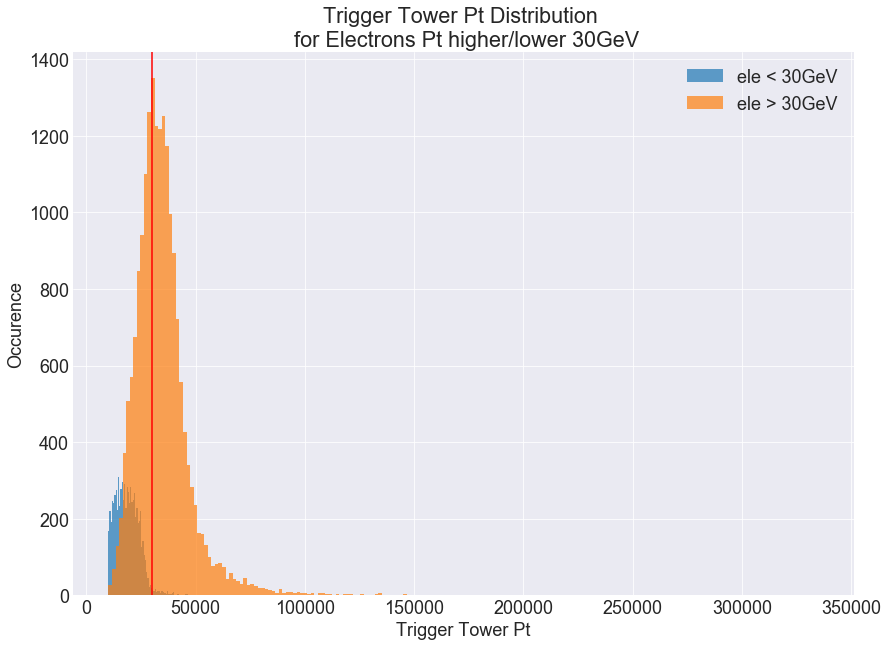

In [9]:
ele_l_30GeV = []                                  # electrons with pt < 30GeV
ele_m_30GeV = []                                  # electrons with pt > 30GeV 

# Separating electrons and appending their trigger tower pt value
for i in range (len(ele_data_cut)):
    if ele_data_cut[i][2] <= 30000:
        ele_l_30GeV.append(ele_data_cut[i][3])
    else:
        ele_m_30GeV.append(ele_data_cut[i][3])
        
print("Number of ele have Pt lower than 30GeV:", len(ele_l_30GeV))  # printing no of ele < 30GeV
print("Number of ele have Pt higher than 30GeV:", len(ele_m_30GeV)) # printing no of ele > 30GeV

# Plots
n, bins, patches = plt.hist(ele_l_30GeV, bins=200, alpha=0.7, label='ele < 30GeV') # trigger tower distribution for ele<30GeV
n, bins, patches = plt.hist(ele_m_30GeV, bins=200, alpha=0.7, label='ele > 30GeV') # trigger tower distribution for ele>30GeV
plt.axvline(x = 30000, color='r')                                                  # trigger tower cut value
plt.title("Trigger Tower Pt Distribution \n for Electrons Pt higher/lower 30GeV")  # plot title
plt.ylabel("Occurence")                                                            # label y axes
plt.xlabel("Trigger Tower Pt")                                                     # label x axes
plt.legend(loc='best')                                                             # show legend

## Applying trigger tower pt cut

As seen in trigger tower distribution, with a cut of 30GeV on trigger tower pt, we could remove most electrons that have pt under 30GeV

In [10]:
# Applting cut to ele data
ele_cut_tt = [] 
for i in range (len(ele_data_cut)):
    if ele_data_cut[i][3] > 30000:
        ele_cut_tt.append(ele_data_cut[i])

# Applting cut to jet data
jet_cut_tt = []
for i in range (len(jet_data_cut)):
    if jet_data_cut[i][3] > 30000:
        jet_cut_tt.append(jet_data_cut[i])

Number of ele data remaining 11978
Number of jet data remaining 1607


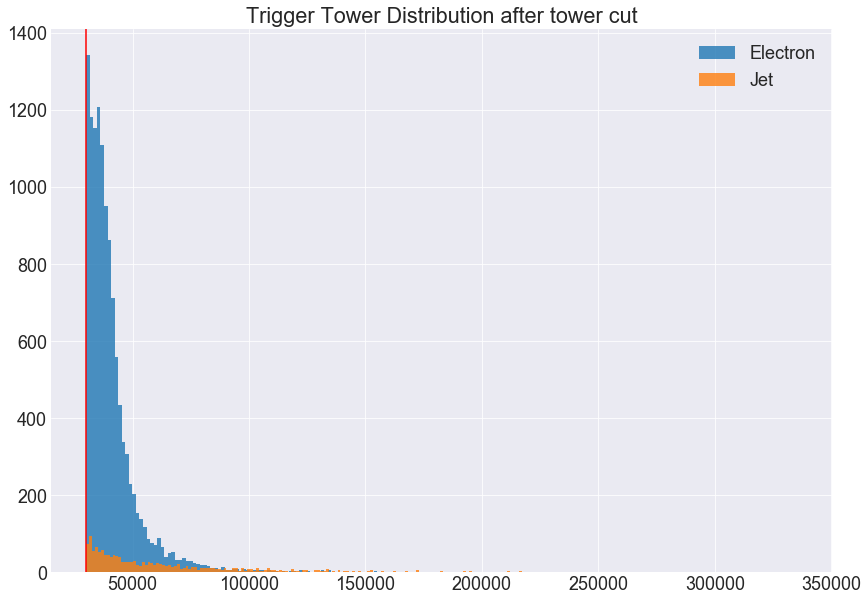

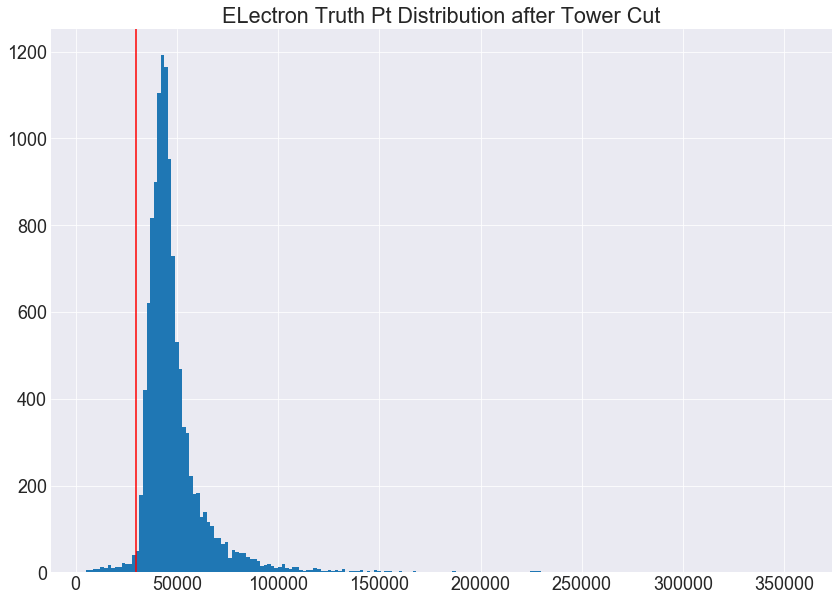

In [11]:
ele_tt = []
ele_truthpt = []
for i in range (len(ele_cut_tt)):
    ele_tt.append(ele_cut_tt[i][3])
    ele_truthpt.append(ele_cut_tt[i][2])

jet_tt = []
for i in range (len(jet_cut_tt)):
    jet_tt.append(jet_cut_tt[i][3])
    
plt.figure()
n, bins, patches = plt.hist(ele_tt, bins=200, label='Electron', alpha=0.8)
n, bins, patches = plt.hist(jet_tt, bins=200, label='Jet', alpha=0.8)
plt.title("Trigger Tower Distribution after tower cut")
plt.legend(loc='best')
plt.axvline(x=30000, color='r')


plt.figure()
n, bins, patches = plt.hist(ele_truthpt, bins=200)
plt.title("ELectron Truth Pt Distribution after Tower Cut")
plt.axvline(x=30000, color='r')

As seen in histogram above, we have removed most electrons with truth pt lower than 30GeV.

### Saving data as .txt file

In [ ]:
np.savetxt("cut_ele_data_30.txt", ele_cut_tt,  delimiter = '	')
np.savetxt("cut_jet_data_30.txt", jet_cut_tt,  delimiter = '	')

In [12]:
print("Number of ele data remaining", len(ele_cut_tt))
print("Number of jet data remaining", len(jet_cut_tt))

Number of ele data remaining 11978
Number of jet data remaining 1607
